# VNNLib Benchmark Visualization
Demonstrate ACT's VNNLib loader with ACAS Xu network visualization

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## CIFAR-100 VNNLib Benchmark Test

Test fully-trained CIFAR-100 models from VNNLib benchmarks.
These models are trained on CIFAR-100 (not ImageNet pre-trained), so they should provide meaningful predictions.

CUDA not available, using CPU
✅ Initialized: device=cpu, dtype=torch.float64
TESTING CIFAR-100 VNNLIB BENCHMARK INSTANCES


onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not available, skipping simplification
onnxsim not a

✓ Loaded 20 VNNLib instances



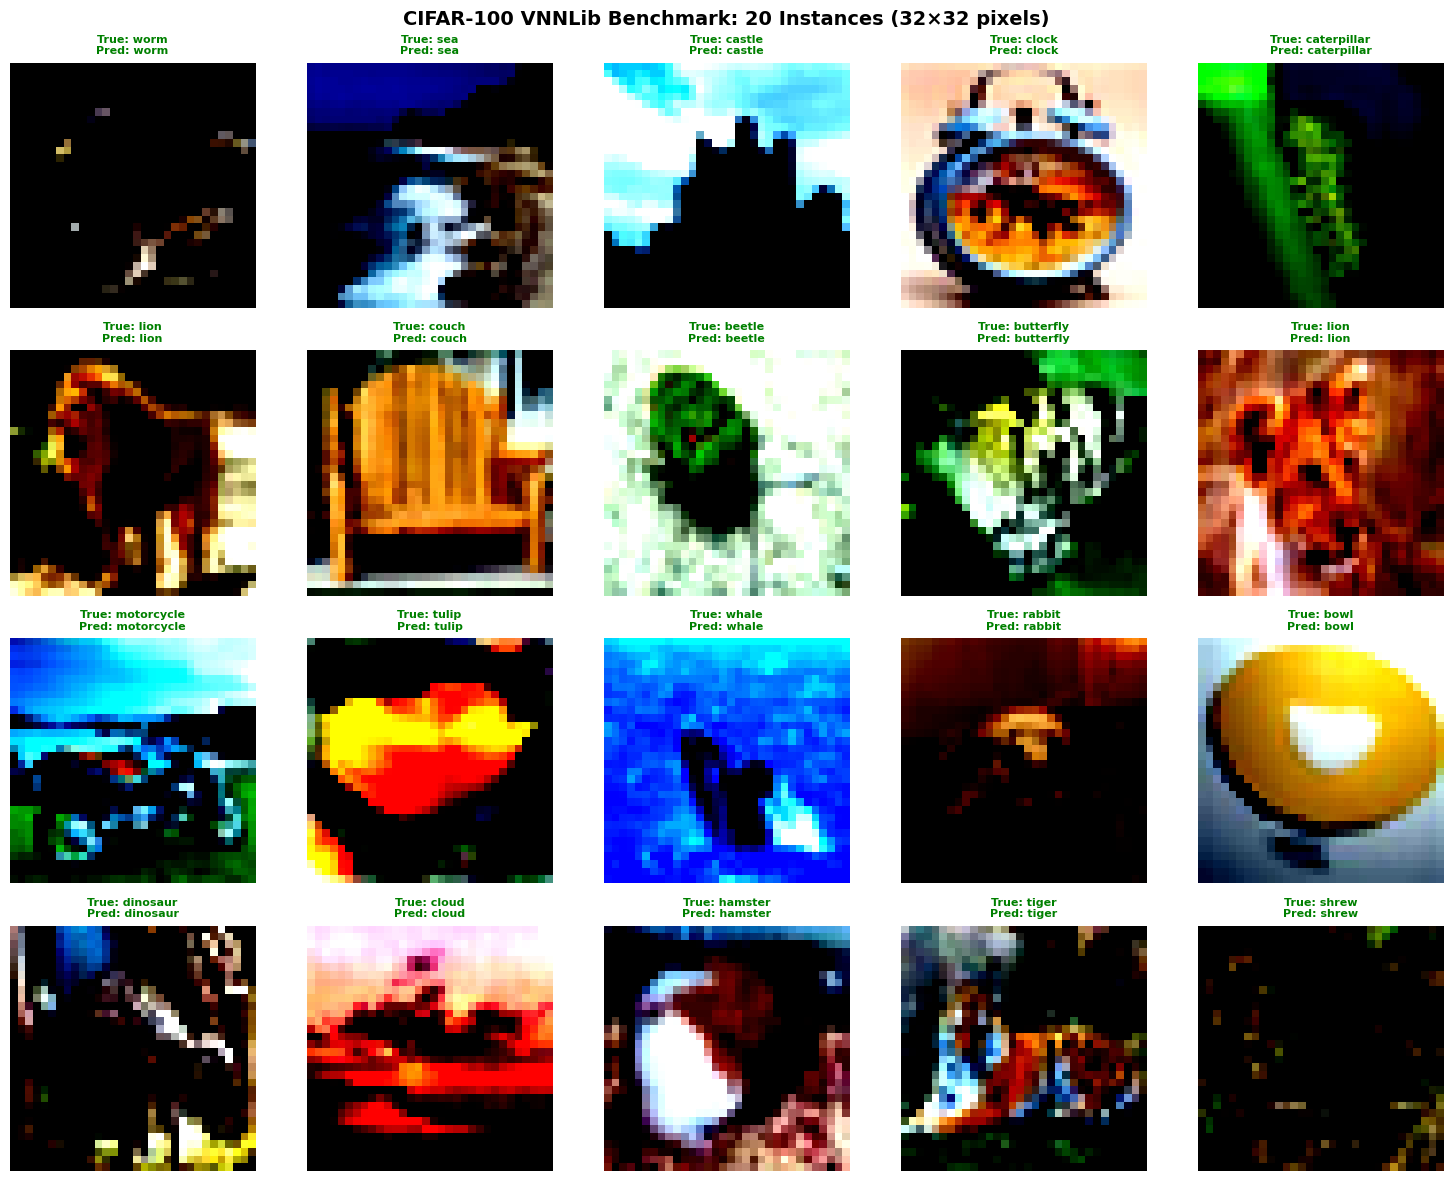

RESULTS: 20/20 correct (100.0% accuracy)

ℹ️  CIFAR-100 has 100 classes (random guess: 1% accuracy)
   Expected accuracy for trained model: 60-80%
   Actual accuracy: 100.0%

DETAILED RESULTS:
   1. ✓ True: worm            | Pred: worm           
   2. ✓ True: sea             | Pred: sea            
   3. ✓ True: castle          | Pred: castle         
   4. ✓ True: clock           | Pred: clock          
   5. ✓ True: caterpillar     | Pred: caterpillar    
   6. ✓ True: lion            | Pred: lion           
   7. ✓ True: couch           | Pred: couch          
   8. ✓ True: beetle          | Pred: beetle         
   9. ✓ True: butterfly       | Pred: butterfly      
  10. ✓ True: lion            | Pred: lion           
  11. ✓ True: motorcycle      | Pred: motorcycle     
  12. ✓ True: tulip           | Pred: tulip          
  13. ✓ True: whale           | Pred: whale          
  14. ✓ True: rabbit          | Pred: rabbit         
  15. ✓ True: bowl            | Pred: bowl         

In [1]:
# Test CIFAR-100 VNNLib Benchmark Instances
import sys
import os
act_root = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
if act_root not in sys.path:
    sys.path.insert(0, act_root)

import torch
import matplotlib.pyplot as plt
import numpy as np
from act.front_end.vnnlib_loader.create_specs import VNNLibSpecCreator

# CIFAR-100 class names (100 fine-grained classes)
CIFAR100_CLASSES = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

print("="*100)
print("TESTING CIFAR-100 VNNLIB BENCHMARK INSTANCES")
print("="*100)

try:
    # Load 20 VNNLib instances (now returns LabeledInputTensors)
    creator = VNNLibSpecCreator(config_name="vnnlib_default")
    spec_results = creator.create_specs_for_data_model_pairs(
        categories=["cifar100_2024"],
        max_instances=20,
        validate_shapes=True
    )
    
    if not spec_results:
        raise RuntimeError("No CIFAR-100 instances found")
    
    print(f"✓ Loaded {len(spec_results)} VNNLib instances\n")
    
    # Collect data from all instances
    images = []
    true_labels = []
    pred_labels = []
    
    # Get first model for inference
    _, _, first_model, _, _ = spec_results[0]
    first_model.eval()
    
    for idx, (category, instance_id, model, labeled_tensors, spec_pairs) in enumerate(spec_results):
        # Unpack LabeledInputTensor (new clean approach - no manual label extraction!)
        labeled_tensor = labeled_tensors[0]
        input_tensor, true_label = labeled_tensor  # Tuple unpacking
                
        # Run inference (use first model for all - they're the same architecture)
        with torch.no_grad():
            output = first_model(input_tensor.unsqueeze(0))
            pred_label = output.argmax(dim=1).item()
        
        # Reshape input_tensor for visualization
        if input_tensor.dim() == 1:
            # Flat tensor: 3072 → 3×32×32 → 32×32×3
            img = input_tensor.reshape(3, 32, 32).permute(1, 2, 0)
        elif input_tensor.dim() == 3:
            # Already 3×32×32 → 32×32×3
            img = input_tensor.permute(1, 2, 0)
        elif input_tensor.dim() == 4:
            # Batch dimension: squeeze and permute
            img = input_tensor.squeeze(0).permute(1, 2, 0)
        else:
            img = input_tensor
        
        images.append(img)
        true_labels.append(true_label if true_label is not None else -1)
        pred_labels.append(pred_label)
    
    # Visualize results
    correct = sum(1 for t, p in zip(true_labels, pred_labels) if t == p and t != -1)
    valid_count = sum(1 for t in true_labels if t != -1)
    
    fig, axes = plt.subplots(4, 5, figsize=(15, 12), dpi=100)
    fig.suptitle('CIFAR-100 VNNLib Benchmark: 20 Instances (32×32 pixels)', 
                 fontsize=14, fontweight='bold')
    
    for idx, ax in enumerate(axes.flat):
        if idx < len(images):
            img = images[idx]
            true_label = true_labels[idx]
            pred_label = pred_labels[idx]
            
            # Display image (denormalize if needed for visualization)
            img_display = img.numpy()
            # Clip to [0, 1] range
            img_display = np.clip(img_display, 0, 1)
            ax.imshow(img_display, interpolation='nearest')
            
            # Get class names
            true_class = CIFAR100_CLASSES[true_label] if true_label != -1 else '?'
            pred_class = CIFAR100_CLASSES[pred_label]
            
            # Color code by correctness
            if true_label == -1:
                color = 'orange'
                title = f'True: ?\nPred: {pred_class}'
            else:
                is_correct = (pred_label == true_label)
                color = 'green' if is_correct else 'red'
                title = f'True: {true_class}\nPred: {pred_class}'
            
            ax.set_title(title, color=color, fontweight='bold', fontsize=8)
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Results
    if valid_count > 0:
        accuracy = (correct / valid_count) * 100
        print(f"{'='*100}")
        print(f"RESULTS: {correct}/{valid_count} correct ({accuracy:.1f}% accuracy)")
        print(f"{'='*100}")
        print(f"\nℹ️  CIFAR-100 has 100 classes (random guess: 1% accuracy)")
        print(f"   Expected accuracy for trained model: 60-80%")
        print(f"   Actual accuracy: {accuracy:.1f}%")
        
        # Print detailed results with class names
        print(f"\nDETAILED RESULTS:")
        for i, (true_label, pred_label) in enumerate(zip(true_labels, pred_labels)):
            if true_label != -1:
                true_class = CIFAR100_CLASSES[true_label]
                pred_class = CIFAR100_CLASSES[pred_label]
                status = "✓" if true_label == pred_label else "✗"
                print(f"  {i+1:2d}. {status} True: {true_class:15s} | Pred: {pred_class:15s}")
        
        if accuracy > 30:
            print(f"\n✓ VNNLib benchmark model is working correctly!")
        else:
            print(f"\n⚠️  Accuracy lower than expected")
    else:
        print(f"\n⚠️  Could not extract ground truth labels from VNNLIB files")
        print(f"   Showing predictions only")
    
    print(f"\n💡 Using LabeledInputTensor: input_tensor paired with ground_truth label")
    print(f"   Labels extracted automatically from VNNLIB comments!")
    print(f"   Clean, maintainable code with no manual parsing!")

except Exception as e:
    import traceback
    print(f"\n⚠️ Error: {e}")
    traceback.print_exc()
    print(f"\n💡 Download CIFAR-100 benchmarks:")
    print(f"   python -m act.front_end.vnnlib_loader.cli --download cifar100_2024")


## White-Box Input Perturbation Fuzzing

Test model robustness using white-box attacks with epsilon values from VNNLib specifications.
Compares random noise vs. gradient-based adversarial perturbations (FGSM/PGD).

In [ ]:
# White-Box Fuzzing: Test Robustness with Gradient-Based Attacks
import sys
import os
act_root = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
if act_root not in sys.path:
    sys.path.insert(0, act_root)

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from act.front_end.vnnlib_loader.create_specs import VNNLibSpecCreator

print("="*100)
print("WHITE-BOX FUZZING: Robustness Testing with Gradient-Based Perturbations")
print("="*100)

def fgsm_attack(model, input_tensor, true_label, epsilon):
    """Fast Gradient Sign Method - single-step white-box attack"""
    input_tensor.requires_grad = True
    output = model(input_tensor.unsqueeze(0))
    loss = F.cross_entropy(output, torch.tensor([true_label]))
    model.zero_grad()
    loss.backward()
    
    # Generate perturbation
    perturbation = epsilon * input_tensor.grad.sign()
    perturbed = input_tensor + perturbation
    
    # Clip to valid range [0, 1]
    perturbed = torch.clamp(perturbed, 0, 1)
    return perturbed.detach()

def pgd_attack(model, input_tensor, true_label, epsilon, alpha=0.01, num_steps=10):
    """Projected Gradient Descent - iterative white-box attack (stronger)"""
    perturbed = input_tensor.clone().detach()
    
    for _ in range(num_steps):
        perturbed.requires_grad = True
        output = model(perturbed.unsqueeze(0))
        loss = F.cross_entropy(output, torch.tensor([true_label]))
        model.zero_grad()
        loss.backward()
        
        # Update with gradient
        perturbation = alpha * perturbed.grad.sign()
        perturbed = perturbed.detach() + perturbation
        
        # Project back to epsilon ball around original
        delta = torch.clamp(perturbed - input_tensor, -epsilon, epsilon)
        perturbed = torch.clamp(input_tensor + delta, 0, 1)
    
    return perturbed

def random_noise_attack(input_tensor, epsilon):
    """Random noise perturbation (baseline)"""
    noise = torch.randn_like(input_tensor) * epsilon
    perturbed = input_tensor + noise
    return torch.clamp(perturbed, 0, 1)

try:
    # Load VNNLib instances
    creator = VNNLibSpecCreator(config_name="vnnlib_default")
    spec_results = creator.create_specs_for_data_model_pairs(
        categories=["cifar100_2024"],
        max_instances=12,  # Test on 12 instances for visualization
        validate_shapes=True
    )
    
    if not spec_results:
        raise RuntimeError("No CIFAR-100 instances found")
    
    print(f"✓ Loaded {len(spec_results)} VNNLib instances\n")
    
    # Extract epsilon from first input spec
    _, _, _, _, spec_pairs = spec_results[0]
    input_spec, _ = spec_pairs[0]
    epsilon = float((input_spec.ub - input_spec.lb).max())  # Get max epsilon from spec
    print(f"✓ Using epsilon from VNNLib spec: {epsilon:.6f}\n")
    
    # Get model
    _, _, model, _, _ = spec_results[0]
    model.eval()
    
    # Test all three attack methods
    attack_results = {
        'Random': {'success': 0, 'examples': []},
        'FGSM': {'success': 0, 'examples': []},
        'PGD': {'success': 0, 'examples': []}
    }
    
    for idx, (category, instance_id, _, labeled_tensors, spec_pairs) in enumerate(spec_results):
        labeled_tensor = labeled_tensors[0]
        input_tensor, true_label = labeled_tensor
        
        # Get original prediction
        with torch.no_grad():
            orig_output = model(input_tensor.unsqueeze(0))
            orig_pred = orig_output.argmax(dim=1).item()
        
        # Only test if original prediction is correct
        if orig_pred != true_label:
            continue
        
        # Test each attack method
        attacks = {
            'Random': random_noise_attack(input_tensor, epsilon),
            'FGSM': fgsm_attack(model, input_tensor.clone(), true_label, epsilon),
            'PGD': pgd_attack(model, input_tensor.clone(), true_label, epsilon)
        }
        
        for attack_name, perturbed in attacks.items():
            with torch.no_grad():
                pert_output = model(perturbed.unsqueeze(0))
                pert_pred = pert_output.argmax(dim=1).item()
            
            # Check if attack succeeded (prediction changed)
            if pert_pred != orig_pred:
                attack_results[attack_name]['success'] += 1
                if len(attack_results[attack_name]['examples']) < 4:  # Keep 4 examples
                    # Prepare images for visualization
                    orig_img = input_tensor.reshape(3, 32, 32).permute(1, 2, 0).numpy()
                    pert_img = perturbed.reshape(3, 32, 32).permute(1, 2, 0).numpy()
                    diff_img = np.abs(pert_img - orig_img)
                    
                    attack_results[attack_name]['examples'].append({
                        'original': np.clip(orig_img, 0, 1),
                        'perturbed': np.clip(pert_img, 0, 1),
                        'difference': diff_img / diff_img.max() if diff_img.max() > 0 else diff_img,
                        'orig_pred': orig_pred,
                        'pert_pred': pert_pred,
                        'true_label': true_label
                    })
    
    # Visualization
    fig = plt.figure(figsize=(18, 14))
    fig.suptitle(f'White-Box Fuzzing: Robustness Testing (ε={epsilon:.4f})', 
                 fontsize=16, fontweight='bold')
    
    attack_names = ['Random', 'FGSM', 'PGD']
    for attack_idx, attack_name in enumerate(attack_names):
        examples = attack_results[attack_name]['examples']
        success_rate = attack_results[attack_name]['success']
        
        for ex_idx, example in enumerate(examples[:4]):
            # Original image
            ax1 = plt.subplot(3, 12, attack_idx * 12 + ex_idx * 3 + 1)
            ax1.imshow(example['original'], interpolation='nearest')
            if ex_idx == 0:
                ax1.set_ylabel(f'{attack_name}\n{success_rate}/{len(spec_results)} flipped', 
                              fontsize=10, fontweight='bold')
            ax1.set_title('Original', fontsize=8)
            ax1.axis('off')
            
            # Perturbed image
            ax2 = plt.subplot(3, 12, attack_idx * 12 + ex_idx * 3 + 2)
            ax2.imshow(example['perturbed'], interpolation='nearest')
            pred_class = CIFAR100_CLASSES[example['pert_pred']]
            ax2.set_title(f'→ {pred_class[:8]}', fontsize=8, color='red', fontweight='bold')
            ax2.axis('off')
            
            # Difference (amplified)
            ax3 = plt.subplot(3, 12, attack_idx * 12 + ex_idx * 3 + 3)
            ax3.imshow(example['difference'], cmap='hot', interpolation='nearest')
            ax3.set_title('Δ (diff)', fontsize=8)
            ax3.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\n{'='*100}")
    print(f"ROBUSTNESS ANALYSIS RESULTS")
    print(f"{'='*100}")
    print(f"Epsilon: {epsilon:.6f} (from VNNLib specification)")
    print(f"Tested: {len(spec_results)} instances\n")
    
    for attack_name in attack_names:
        success = attack_results[attack_name]['success']
        success_rate = (success / len(spec_results)) * 100
        print(f"{attack_name:8s} Attack: {success:2d}/{len(spec_results)} successful ({success_rate:5.1f}% flip rate)")
    
    print(f"\n💡 Key Insights:")
    print(f"   • Random noise: Weakest attack (black-box baseline)")
    print(f"   • FGSM: Fast white-box attack using gradients")
    print(f"   • PGD: Strongest iterative white-box attack")
    print(f"   • Higher flip rate = Less robust model")
    print(f"\n✓ White-box fuzzing reveals vulnerabilities even within ε={epsilon:.4f} bounds!")
    print(f"   This demonstrates why formal verification is crucial for safety-critical systems.")

except Exception as e:
    import traceback
    print(f"\n⚠️ Error: {e}")
    traceback.print_exc()

## VNNLib ACAS Xu Perturbation Visualization

This section demonstrates:
- Loading ACAS Xu networks from VNNLib benchmarks
- Parsing VNNLIB specifications for input bounds
- Visualizing input specifications as bar charts
- Testing network behavior on sample points
- Interpreting ACAS Xu collision avoidance outputs

Loading ACAS Xu network and specification...



onnxsim not available, skipping simplification


✓ Model loaded: <class 'onnx2pytorch.convert.model.ConvertModel'>
✓ Input tensor shape: torch.Size([1, 1, 5])
✓ VNNLib metadata: 5 inputs, 5 outputs
✓ Property type: unknown


/Users/z3310488/miniconda3/envs/act-py312/lib/python3.12/site-packages/onnx2pytorch/convert/operations.py:156: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1729646995093/work/torch/csrc/utils/tensor_numpy.cpp:212.)
  weight = torch.from_numpy(numpy_helper.to_array(params[0]))


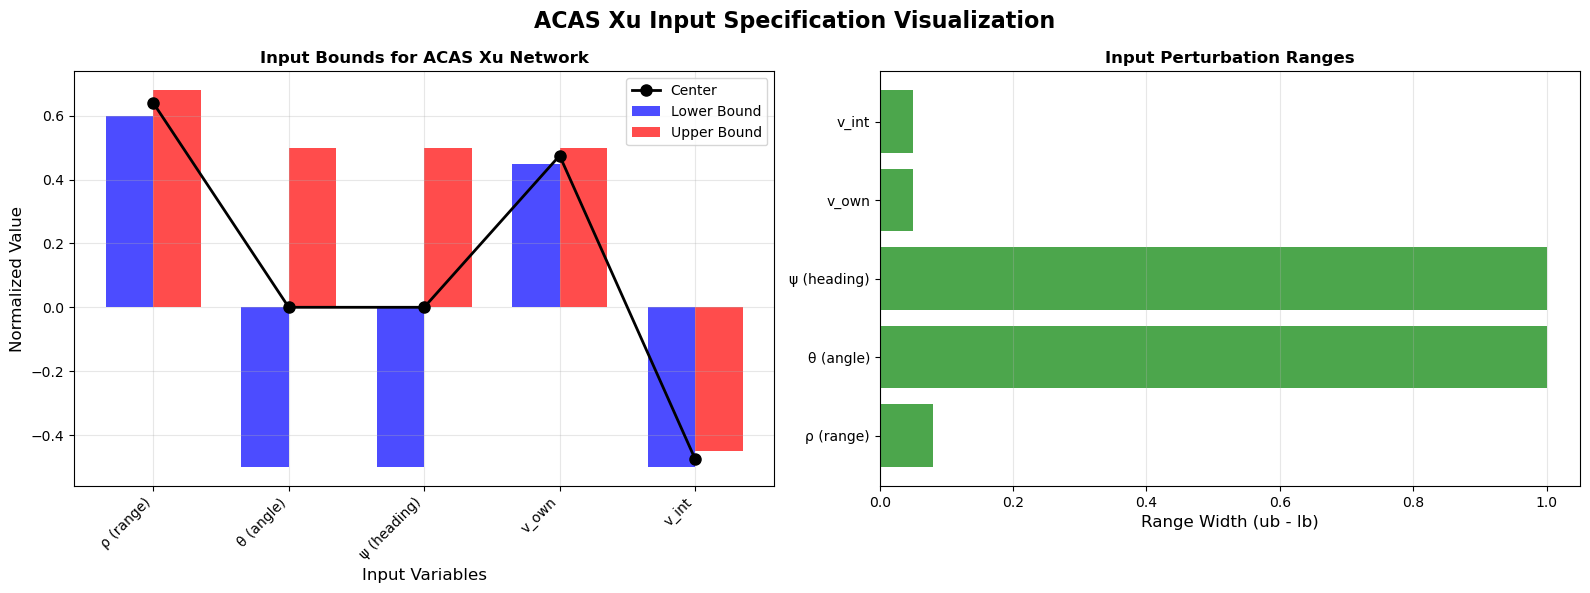


Testing Network on Sample Points

Lower Bound:
  Input: [ 0.6  -0.5  -0.5   0.45 -0.5 ]
  Output: [-0.0202845 -0.0193085 -0.019157  -0.0189128 -0.0189197]
  Recommended Action: Strong Left

Center:
  Input: [ 0.6399289  0.         0.         0.475     -0.475    ]
  Output: [-0.0203966  -0.01847511 -0.01822628 -0.01796024 -0.01798192]
  Recommended Action: Strong Left

Upper Bound:
  Input: [ 0.6798578  0.5        0.5        0.5       -0.45     ]
  Output: [-0.0202845 -0.0193085 -0.019157  -0.0189128 -0.0189197]
  Recommended Action: Strong Left

✓ Tested ACAS Xu network on 3 sample points
  Input dimension: 5
  Output dimension: 5


In [ ]:
# ACT VNNLib: Visualize ACAS Xu Specs using VNNLibSpecCreator
import sys
import os

# Setup ACT paths
act_root = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
if act_root not in sys.path:
    sys.path.insert(0, act_root)

import torch
import matplotlib.pyplot as plt
import numpy as np
from act.front_end.vnnlib_loader.create_specs import VNNLibSpecCreator

print("Loading ACAS Xu using VNNLibSpecCreator...\n")
try:
    # Create spec creator and load ACAS Xu
    creator = VNNLibSpecCreator(config_name="vnnlib_default")
    spec_results = creator.create_specs_for_data_model_pairs(
        categories=["acasxu_2023"],
        max_instances=1,
        validate_shapes=True
    )
    
    if not spec_results:
        raise RuntimeError("No ACAS Xu instances found")
    
    # Unpack first result (now uses LabeledInputTensor)
    category, instance_id, model, labeled_tensors, spec_pairs = spec_results[0]
    labeled_tensor = labeled_tensors[0]
    input_tensor, label = labeled_tensor  # Tuple unpacking
    input_spec, output_spec = spec_pairs[0]
    
    print(f"✓ Loaded: {category}/{instance_id}")
    print(f"✓ Model: {type(model).__name__}")
    print(f"✓ Input tensor shape: {input_tensor.shape}")
    print(f"✓ Ground truth label: {label if label is not None else 'N/A'}")
    print(f"✓ Input spec: {input_spec.kind} (lb={input_spec.lb.shape}, ub={input_spec.ub.shape})")
    print(f"✓ Output spec: {output_spec.kind}\n")
    
    # Extract bounds from InputSpec
    input_names = ['ρ (range)', 'θ (angle)', 'ψ (heading)', 'v_own', 'v_int']
    lb = input_spec.lb.numpy()
    ub = input_spec.ub.numpy()
    center = input_tensor.numpy()
    
    # Visualize bounds
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'ACAS Xu Input Specification: {instance_id}', fontsize=16, fontweight='bold')
    
    x = np.arange(len(input_names))
    width = 0.35
    
    axes[0].bar(x - width/2, lb, width, label='Lower Bound', color='blue', alpha=0.7)
    axes[0].bar(x + width/2, ub, width, label='Upper Bound', color='red', alpha=0.7)
    axes[0].plot(x, center, 'ko-', label='Center', linewidth=2, markersize=8)
    axes[0].set_xlabel('Input Variables', fontsize=12)
    axes[0].set_ylabel('Normalized Value', fontsize=12)
    axes[0].set_title('Input Bounds', fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(input_names, rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    ranges = ub - lb
    axes[1].barh(input_names, ranges, color='green', alpha=0.7)
    axes[1].set_xlabel('Range Width (ub - lb)', fontsize=12)
    axes[1].set_title('Input Perturbation Ranges', fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    # Test inference with lower bound, center, upper bound
    print("="*70)
    print("Testing Network on Sample Points")
    print("="*70)
    
    test_points = {
        'Lower Bound': input_spec.lb.unsqueeze(0),
        'Center': input_tensor.unsqueeze(0),
        'Upper Bound': input_spec.ub.unsqueeze(0)
    }
    
    model.eval()
    action_names = ['Clear-of-Conflict', 'Weak Left', 'Weak Right', 
                   'Strong Left', 'Strong Right']
    
    with torch.no_grad():
        for name, point in test_points.items():
            output = model(point)
            action = output.argmax(dim=1).item()
            print(f"\n{name}:")
            print(f"  Input: {point.numpy().flatten()}")
            print(f"  Output: {output.numpy().flatten()}")
            print(f"  Recommended Action: {action_names[action]}")
    
    print("\n" + "="*70)
    print(f"✓ Tested ACAS Xu network on {len(test_points)} sample points")
    
except Exception as e:
    import traceback
    print(f"⚠ Could not load ACAS Xu: {e}")
    traceback.print_exc()
    print("\n💡 Download ACAS Xu benchmarks:")
    print("  python -m act.front_end.vnnlib_loader.cli --download acasxu_2023")
    print("\nFalling back to CIFAR10 visualization...")
    
    # Fallback: Show CIFAR10
    import torchvision
    import torchvision.transforms as transforms
    
    cifar_dataset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True,
        transform=transforms.ToTensor()
    )
    
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']
    
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.suptitle('CIFAR10 Dataset - First 10 Images (Fallback)', fontsize=16)
    
    for idx, ax in enumerate(axes.flat):
        img, label = cifar_dataset[idx]
        img = img.numpy().transpose(1, 2, 0)
        ax.imshow(img)
        ax.set_title(f'{class_names[label]}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nCIFAR10 Dataset size: {len(cifar_dataset)}")
    print(f"Image shape: {cifar_dataset[0][0].shape}")

## Understanding VNNLib Specifications

VNNLib specifications use SMT-LIB format to define:
- Input constraints (box bounds, L∞ perturbations)
- Output properties (safety, robustness)
- Verification tasks for standardized benchmarks

In [1]:
print("="*70)
print("VNNLib Benchmark Approach")
print("="*70)
print("""
✓ **STANDARDIZED BENCHMARKS**: Pre-defined verification tasks
  - ACAS Xu: Aircraft collision avoidance (5 inputs, 5 outputs)
  - VNN-COMP: Competition benchmarks for fair comparison
  - Multiple domains: MNIST, CIFAR, control systems

✓ **SPECIFICATIONS IN SMT-LIB**: Formal constraint definitions
  - Input bounds: (assert (>= X_0 0.6)) (assert (<= X_0 0.68))
  - Output properties: Safety conditions, robustness requirements
  - Property types: Local vs. global specifications

✓ **VERIFICATION WORKFLOW**: 
  1. Load ONNX model and VNNLIB spec
  2. Parse input bounds from SMT-LIB assertions
  3. Convert to internal format (tensors, metadata)
  4. Run verification with specified property
  5. Return SAT/UNSAT/UNKNOWN result

This approach is ideal for:
  • Research paper benchmarking
  • Competition participation (VNN-COMP)
  • Reproducible verification results
  • Standardized tool comparison

CONTRAST WITH TORCHVISION:
  • VNNLib: Fixed specs, standardized benchmarks, SMT-LIB format
  • TorchVision: Custom specs, flexible datasets, Python API
  • Both valid: Use VNNLib for benchmarks, TorchVision for custom tasks
""")

VNNLib Benchmark Approach

✓ **STANDARDIZED BENCHMARKS**: Pre-defined verification tasks
  - ACAS Xu: Aircraft collision avoidance (5 inputs, 5 outputs)
  - VNN-COMP: Competition benchmarks for fair comparison
  - Multiple domains: MNIST, CIFAR, control systems

✓ **SPECIFICATIONS IN SMT-LIB**: Formal constraint definitions
  - Input bounds: (assert (>= X_0 0.6)) (assert (<= X_0 0.68))
  - Output properties: Safety conditions, robustness requirements
  - Property types: Local vs. global specifications

✓ **VERIFICATION WORKFLOW**: 
  1. Load ONNX model and VNNLIB spec
  2. Parse input bounds from SMT-LIB assertions
  3. Convert to internal format (tensors, metadata)
  4. Run verification with specified property
  5. Return SAT/UNSAT/UNKNOWN result

This approach is ideal for:
  • Research paper benchmarking
  • Competition participation (VNN-COMP)
  • Reproducible verification results
  • Standardized tool comparison

CONTRAST WITH TORCHVISION:
  • VNNLib: Fixed specs, standardized ben